In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
!pip install yfinance                                                           # installing yfinance to download market data 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
import warnings                                                                 #Exception handling   
warnings.filterwarnings('ignore')
import yfinance as yf                                                           #Download market data of Microsoft 

import pandas as pd 
import numpy as np
import seaborn as sns 

import matplotlib as mpl
import plotly.graph_objs as go
import matplotlib.pyplot as plt
plt.style.use('seaborn-darkgrid')
plt.rc('figure', figsize=(18,8))
plt.rc('lines', markersize=4)
plt.rc('font', size=18)
!rm -rf ./logs/

from sklearn.metrics import confusion_matrix                                    #Compute confusion matrix to evaluate the accuracy of a classification.




In [4]:
!pip install AlmaIndicator

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
import os
os.chdir('/content/drive/MyDrive/new')                                          #changeing the current working directory to the given path.
                                                  


In [6]:
import Methods as met                                                           #Importing the Methods and fuction 

In [7]:
MSFT_data = yf.download("MSFT", start="2012-01-01", end="2022-8-31")            #Downloading stock data of microsoft

[*********************100%***********************]  1 of 1 completed


# Preprocessing & EDA

In [8]:
MSFT_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2683 entries, 2012-01-03 to 2022-08-30
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       2683 non-null   float64
 1   High       2683 non-null   float64
 2   Low        2683 non-null   float64
 3   Close      2683 non-null   float64
 4   Adj Close  2683 non-null   float64
 5   Volume     2683 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 146.7 KB


In [9]:
MSFT_data.shape

(2683, 6)

In [10]:
MSFT_data.head(5)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,26.549999,26.959999,26.389999,26.770000,21.466700,64731500
2012-01-04,26.820000,27.469999,26.780001,27.400000,21.971893,80516100
2012-01-05,27.379999,27.730000,27.290001,27.680000,22.196424,56081400
2012-01-06,27.530001,28.190001,27.530001,28.110001,22.541243,99455500
2012-01-09,28.049999,28.100000,27.719999,27.740000,22.244534,59706800


In [11]:
MSFT_data.tail(30)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-07-20,259.899994,264.869995,258.910004,262.269989,260.979004,22788300
2022-07-21,259.790009,264.890015,257.029999,264.839996,263.536346,22404700
2022-07-22,265.239990,265.329987,259.070007,260.359985,259.078369,21881300
2022-07-25,261.000000,261.500000,256.809998,258.829987,257.555939,21056000
2022-07-26,259.859985,259.880005,249.570007,251.899994,250.660034,39348000
2022-07-27,261.160004,270.049988,258.850006,268.739990,267.417145,45994000
2022-07-28,269.750000,277.839996,267.869995,276.410004,275.049377,33459300
2022-07-29,277.700012,282.000000,276.630005,280.739990,279.358093,32152800
2022-08-01,277.820007,281.279999,275.839996,278.010010,276.641510,21539600


In [12]:
met.Stocks.null_values(MSFT_data)                                               #Finding the null values with the help of function

Total Numbers of Null Values: 0


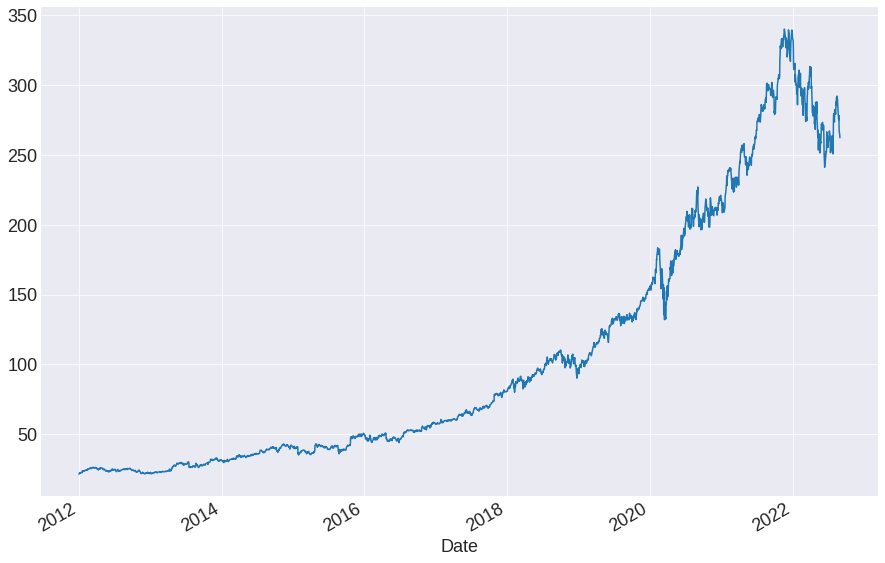

In [13]:
MSFT_data['Adj Close'].plot(figsize = (15,10))

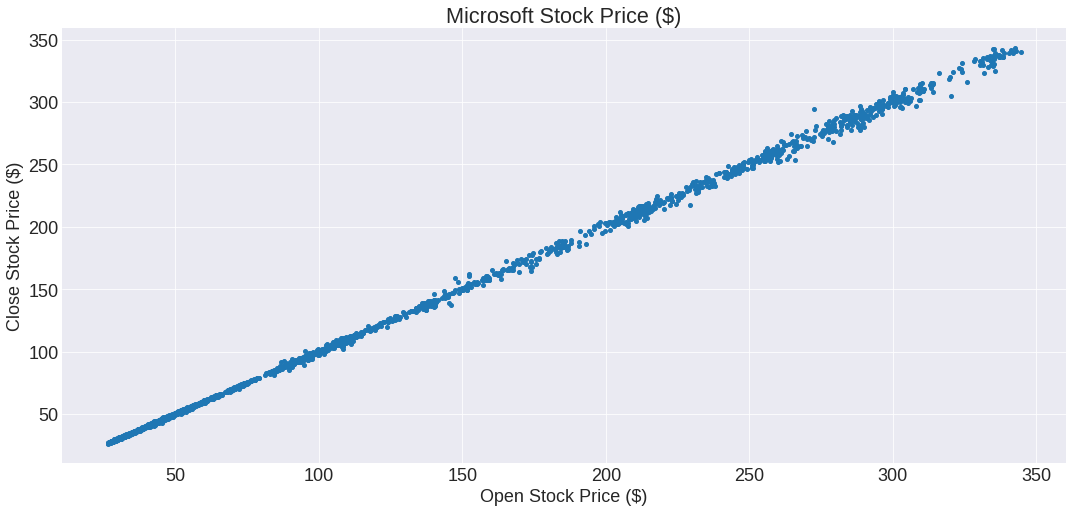

In [14]:
plt.title('Microsoft Stock Price ($)')
plt.xlabel('Open Stock Price ($)')
plt.ylabel('Close Stock Price ($)')
plt.scatter(MSFT_data['Open'],MSFT_data['Close'])
plt.show()

#Linear Regression Model

In [15]:
# Prediction 30 days into the future.
finaldays = 30                                    

In [16]:
MSFT_data['prediction'] = MSFT_data[['Close']].shift(-finaldays)                #In order to get 30 Null values in prediction column
MSFT_data.tail(40)                                                              #creating a column 'Prediction' using close columns data by shifting 30 rows of data ahead from the close column.


,Open,High,Low,Close,Adj Close,Volume,prediction
Date,,,,,,,
2022-07-06,263.750000,267.989990,262.399994,266.209991,264.899597,23824400,291.320007
2022-07-07,265.119995,269.059998,265.019989,268.399994,267.078796,20859900,290.170013
2022-07-08,264.790009,268.100006,263.290009,267.660004,266.342468,19658800,286.149994
2022-07-11,265.649994,266.529999,262.179993,264.510010,263.207977,19455200,277.750000
2022-07-12,265.880005,265.940002,252.039993,253.669998,252.421326,35868500,276.440002
2022-07-13,250.190002,253.550003,248.110001,252.720001,251.476013,29497400,275.790009
2022-07-14,250.570007,255.139999,245.940002,254.080002,252.829330,25102800,278.850006
2022-07-15,255.720001,260.369995,254.770004,256.720001,255.456329,29774100,268.089996
2022-07-18,259.750000,260.839996,253.300003,254.250000,252.998474,20975000,265.230011


In [17]:
x = np.array(MSFT_data.drop(['prediction'], 1))[:-finaldays]                    #Converting data set into an array without the "prediction" column without last 30 days data

x

array([[2.65499992e+01, 2.69599991e+01, 2.63899994e+01, 2.67700005e+01,
        2.14666996e+01, 6.47315000e+07],
       [2.68199997e+01, 2.74699993e+01, 2.67800007e+01, 2.73999996e+01,
        2.19718933e+01, 8.05161000e+07],
       [2.73799992e+01, 2.77299995e+01, 2.72900009e+01, 2.76800003e+01,
        2.21964245e+01, 5.60814000e+07],
       ...,
       [2.55720001e+02, 2.60369995e+02, 2.54770004e+02, 2.56720001e+02,
        2.55456329e+02, 2.97741000e+07],
       [2.59750000e+02, 2.60839996e+02, 2.53300003e+02, 2.54250000e+02,
        2.52998474e+02, 2.09750000e+07],
       [2.57579987e+02, 2.59720001e+02, 2.53679993e+02, 2.59529999e+02,
        2.58252502e+02, 2.50126000e+07]])

In [18]:
y =np.array(MSFT_data['prediction'])[:-finaldays]                               #Converting data set into an array with only the "prediction" column without last 30 days data
y                                                                               # last 30 days data of prediction column is Null(NAN)

array([ 30.04999924,  31.29000092,  31.25      , ..., 268.08999634,
       265.23001099, 262.97000122])

In [19]:
from sklearn.model_selection import train_test_split                            #Split arrays into random train and test subsets.
x_train,x_test, y_train,y_test = train_test_split(x,y, test_size=0.25)          #Spliting Data Test=25% and Train=75%

In [20]:
from sklearn.linear_model import LinearRegression                               
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [21]:
from sklearn import linear_model
linear = linear_model.LinearRegression()

In [22]:
linear = LinearRegression().fit(x_train, y_train)

In [23]:
print('Coefficients: \n', linear.coef_)                                          #coefficients are the values that multiply the predictor values.
print('Intercept: \n', linear.intercept_)

Coefficients: 
 [-6.63134106e-01  1.04007650e-01  1.58477708e+00 -3.15570648e+00
  3.12836651e+00  9.11962733e-09]
Intercept: 
 19.293648969288668


**Let’s check our accuracy
Now, let’s compute the goodness of the fit using the score() function.**

In [24]:
print("Performance (R^2): ", linear.score(x_train, y_train))                      #Let’s check our accuracy Now, let’s compute the fit using the score() function.

Performance (R^2):  0.9857783834143125


**Output — 98.57
As it can be seen, the R-squared of the model is 98.57%. R-squared is always between 0 and 100%. A score close to 100% indicates that the model explains the Msft prices well.**

In [25]:
def get_mape(y_true, y_pred): 
    
                                                                                 #Compute mean absolute percentage error (MAPE)
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    

In [26]:
y_train_pred = linear.predict(x_train)
y_test_pred = linear.predict(x_test)

In [27]:
import sklearn.metrics as metrics
print("Training R-squared: ",round(metrics.r2_score(y_train,y_train_pred),2))
print("Training Explained Variation: ",round(metrics.explained_variance_score(y_train,y_train_pred),2))
print('Training MAPE:', round(get_mape(y_train,y_train_pred), 2)) 
print('Training Mean Squared Error:', round(metrics.mean_squared_error(y_train,y_train_pred), 2)) 
print("Training RMSE: ",round(np.sqrt(metrics.mean_squared_error(y_train,y_train_pred)),2))
print("Training MAE: ",round(metrics.mean_absolute_error(y_train,y_train_pred),2))

print(' ')


Training R-squared:  0.99
Training Explained Variation:  0.99
Training MAPE: 5.49
Training Mean Squared Error: 112.08
Training RMSE:  10.59
Training MAE:  6.22
 


In [28]:
print("Test R-squared: ",round(metrics.r2_score(y_test,y_test_pred),2))
print("Test Explained Variation: ",round(metrics.explained_variance_score(y_test,y_test_pred),2))
print('Test MAPE:', round(get_mape(y_test,y_test_pred), 2)) 
print('Test Mean Squared Error:', round(metrics.mean_squared_error(y_test,y_test_pred), 2)) 
print("Test RMSE: ",round(np.sqrt(metrics.mean_squared_error(y_test,y_test_pred)),2))
print("Test MAE: ",round(metrics.mean_absolute_error(y_test,y_test_pred),2))

Test R-squared:  0.99
Test Explained Variation:  0.99
Test MAPE: 5.36
Test Mean Squared Error: 99.12
Test RMSE:  9.96
Test MAE:  5.76


In [30]:
x_future = MSFT_data.drop(['prediction'], 1)[:-finaldays]                       #x_future  contains data of all fetures in the dataset without last 30 days data and without the "prediction" column, and then they are coverted into an array.
x_future = x_future.tail(finaldays)
x_future = np.array(x_future)
x_future

array([[2.72059998e+02, 2.74179993e+02, 2.67220001e+02, 2.68750000e+02,
        2.67427094e+02, 2.24003000e+07],
       [2.66640015e+02, 2.73130005e+02, 2.65940002e+02, 2.72500000e+02,
        2.71158661e+02, 2.28607000e+07],
       [2.71709991e+02, 2.73000000e+02, 2.69609985e+02, 2.70410004e+02,
        2.69078949e+02, 1.73723000e+07],
       [2.67779999e+02, 2.72709991e+02, 2.64630005e+02, 2.64790009e+02,
        2.63486603e+02, 2.64397000e+07],
       [2.60579987e+02, 2.60579987e+02, 2.52529999e+02, 2.52990005e+02,
        2.51744690e+02, 3.14228000e+07],
       [2.45110001e+02, 2.49020004e+02, 2.41529999e+02, 2.42259995e+02,
        2.41067490e+02, 4.61358000e+07],
       [2.43860001e+02, 2.45740005e+02, 2.41509995e+02, 2.44490005e+02,
        2.43286530e+02, 2.86515000e+07],
       [2.48309998e+02, 2.55300003e+02, 2.46419998e+02, 2.51759995e+02,
        2.50520737e+02, 3.31117000e+07],
       [2.45979996e+02, 2.47419998e+02, 2.43020004e+02, 2.44970001e+02,
        2.43764160e+02, 

In [31]:
linear_prediction = linear.predict(x_future)                                    #So the target is x_future

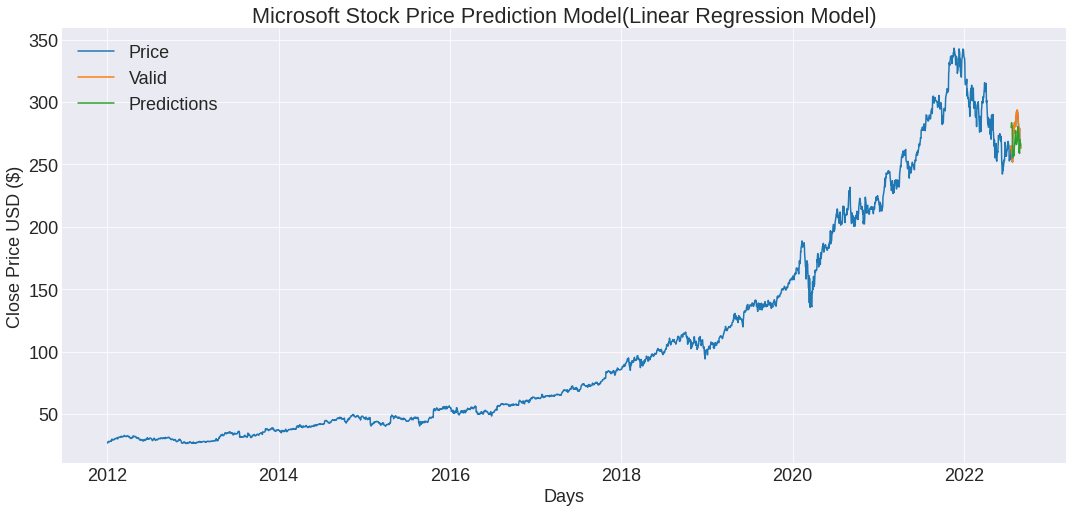

In [32]:
predictions = linear_prediction
valid = MSFT_data[x.shape[0]:]
valid["Predictions"] = predictions
plt.title("Microsoft Stock Price Prediction Model(Linear Regression Model)")
plt.xlabel("Days")
plt.ylabel("Close Price USD ($)")
plt.plot(MSFT_data["Close"])
plt.plot(valid[["Close", "Predictions"]])
plt.legend(["Price", "Valid", "Predictions"])
plt.show()

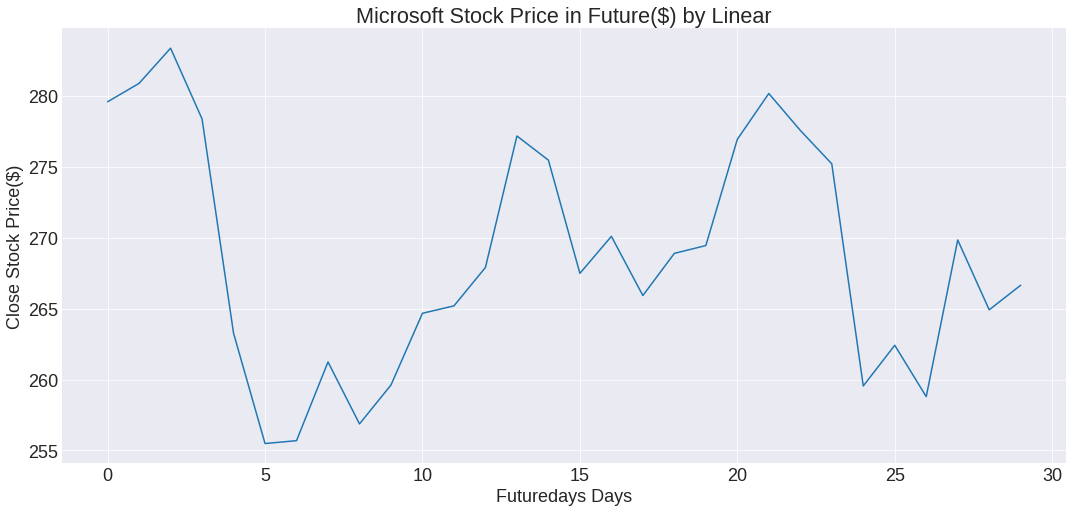

In [33]:
plt.title('Microsoft Stock Price in Future($) by Linear')
plt.xlabel('Futuredays Days')
plt.ylabel('Close Stock Price($)')
plt.plot(linear_prediction)

# Decision Tree

In [35]:
tree = DecisionTreeRegressor().fit(x_train,y_train)

In [36]:
tree_prediction = tree.predict(x_future)

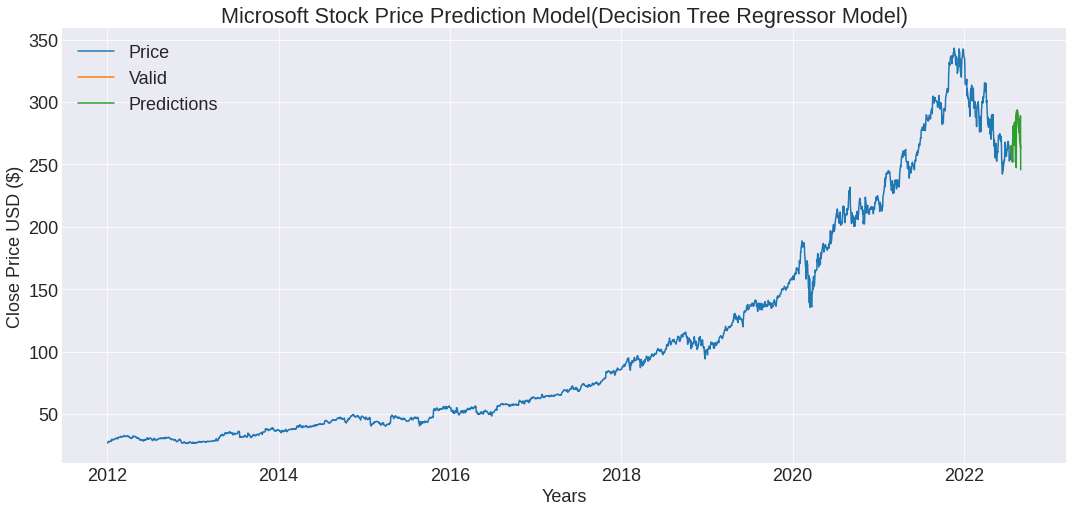

In [37]:
predictions = tree_prediction
valid = MSFT_data[x.shape[0]:]
valid["Predictions"] = predictions
plt.title("Microsoft Stock Price Prediction Model(Decision Tree Regressor Model)")
plt.xlabel("Years")
plt.ylabel("Close Price USD ($)")
plt.plot(MSFT_data["Close"])
plt.plot(valid[["Close", "Predictions"]])
plt.legend(["Price", "Valid", "Predictions"])
plt.show()

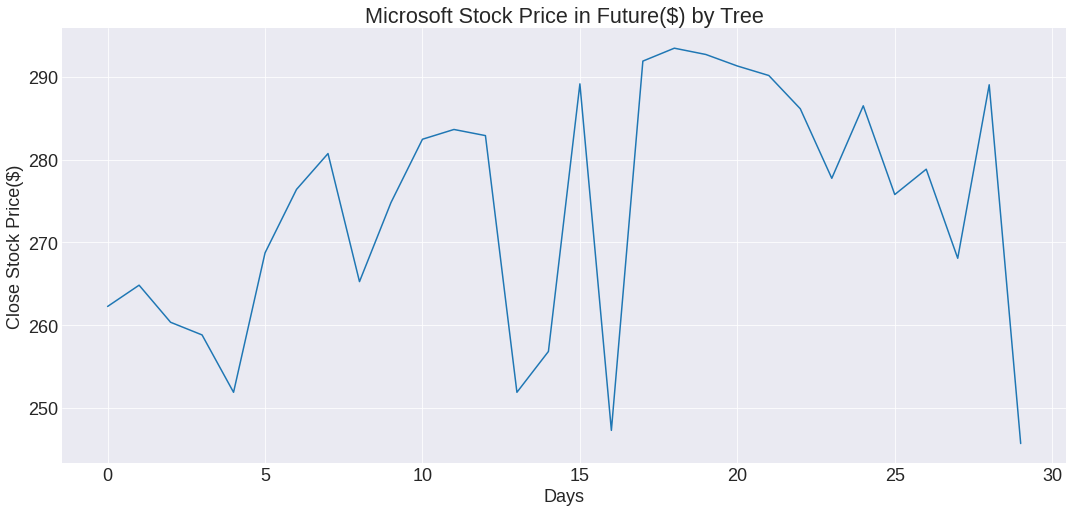

In [38]:
plt.title('Microsoft Stock Price in Future($) by Tree')
plt.xlabel('Days')
plt.ylabel('Close Stock Price($)')
plt.plot(tree_prediction)

# Scaling

In [51]:
from sklearn.preprocessing import MinMaxScaler


In [52]:
import numpy as np
#Set up column for scheme A
met.Stocks.scheme_A(MSFT_data)

MSFT_data.tail()

,Open,High,Low,Close,Adj Close,Volume,prediction,Scheme1
Date,,,,,,,,
2022-08-24,275.410004,277.230011,275.109985,275.790009,275.014984,18137000,NaN,1
2022-08-25,277.329987,279.019989,274.519989,278.850006,278.066376,16583400,NaN,-1
2022-08-26,279.079987,280.339996,267.980011,268.089996,267.336609,27549300,NaN,-1
2022-08-29,265.850006,267.399994,263.850006,265.230011,264.484650,20338500,NaN,-1
2022-08-30,266.670013,267.049988,260.660004,262.970001,262.230988,22767100,NaN,-1


In [41]:
##Identifying Variables
##important to use double brackets

xfeature = MSFT_data[['Adj Close']]
yfeature = MSFT_data[['Scheme1']]

xfeature.head()

,Adj Close
Date,
2012-01-03,21.466700
2012-01-04,21.971893
2012-01-05,22.196424
2012-01-06,22.541243
2012-01-09,22.244534


In [42]:
yfeature.head()

,Scheme1
Date,
2012-01-03,1
2012-01-04,1
2012-01-05,1
2012-01-06,-1
2012-01-09,1


In [43]:
x_train, x_test, y_train, y_test = train_test_split(xfeature, yfeature, train_size = .8, random_state = 50) 
#spliting the data in 80-20 using train_test_split

In [44]:
## Pre-feature scaling description
x_train.describe()

,Adj Close
count,2146.000000
mean,104.425247
std,88.617441
min,21.466700
25%,37.121369
50%,63.188307
75%,147.378010
max,339.924805


In [45]:
scaler = MinMaxScaler()  #transforming data by scaling features to a given range we are using MinMaxScaler
scaler.fit(x_train)      #computing the mean and std dev for a given x_train so that it can be used further for scaling.

MinMaxScaler()

In [46]:
scaler.data_min_   #Minimum feature value

array([21.4666996])

In [47]:
scaler.feature_range    #range for the feature returned by MinMaxScaler is  0 to 1

(0, 1)

In [48]:
x_train = scaler.transform(x_train)   #performing scaling using mean and std dev calculated using the .fit() method.
x_test = scaler.transform(x_test)

In [49]:
S2listofmodels = []                   #creating and empty array to display the result(Model Name, Accuracy)
S2listofaccuracies = []

# Scheme1

In [50]:
MSFT_data.head()

,Open,High,Low,Close,Adj Close,Volume,prediction,Scheme1
Date,,,,,,,,
2012-01-03,26.549999,26.959999,26.389999,26.770000,21.466700,64731500,30.049999,1
2012-01-04,26.820000,27.469999,26.780001,27.400000,21.971893,80516100,31.290001,1
2012-01-05,27.379999,27.730000,27.290001,27.680000,22.196424,56081400,31.250000,1
2012-01-06,27.530001,28.190001,27.530001,28.110001,22.541243,99455500,31.440001,-1
2012-01-09,28.049999,28.100000,27.719999,27.740000,22.244534,59706800,31.270000,1


In [54]:
#After splitting, we will train the model on the training set and perform predictions on the test set.
#Import Random Forest Model                                          
from sklearn.ensemble import RandomForestClassifier    #mprove the predictive accuracy and control over-fitting                            
#Creating a Gaussian Classifier
rf_clf = RandomForestClassifier(n_estimators = 1000, max_depth = 8)  #n_estimators = 1000 The number of trees in the forest.
#Training the model using the training sets y_pred=rf_clf.predict(x_test)
rf_clf.fit(x_train, y_train)

RandomForestClassifier(max_depth=8, n_estimators=1000)

In [55]:
#After training, we will check the accuracy using actual and predicted values for scheme 1.
#Importing scikit-learn metrics module for accuracy calculation
from sklearn import metrics

y_pred = rf_clf.predict(x_test)
# Model Accuracy, how often is the classifier correct?
print("Accuracy: ", metrics.accuracy_score(y_test, y_pred))

S2listofmodels.append("Random Forest - Scheme1")
S2listofaccuracies.append(metrics.accuracy_score(y_test, y_pred))

Accuracy:  0.5176908752327747


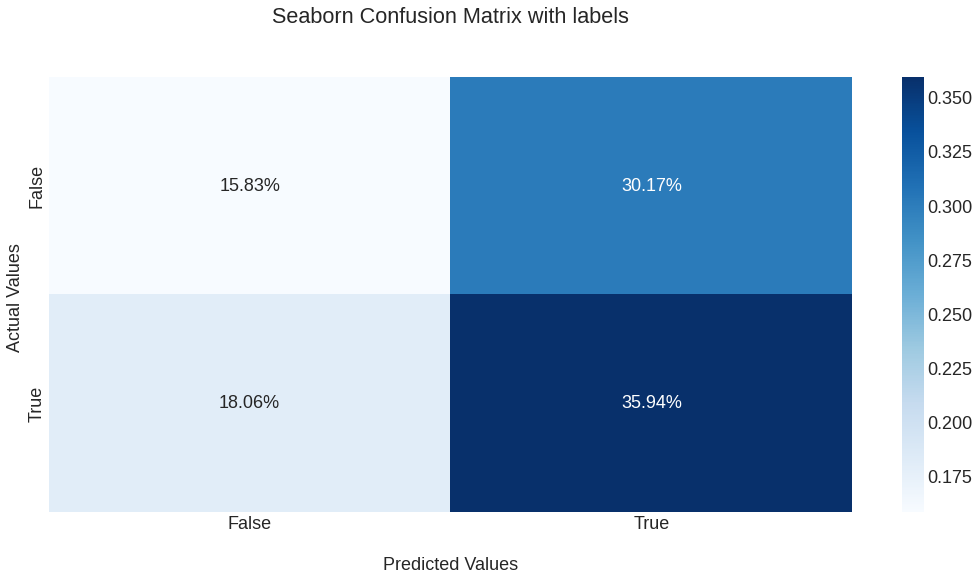

In [56]:
# visualizing the feature importance usind seaborn
cf_matrix = confusion_matrix(y_test, y_pred)
ax = sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

plt.show()

# Scheme2

In [59]:
#To calculate a moving average in Pandas, we will combine the rolling() function with the mean() function
met.Stocks.scheme_B(MSFT_data)
#rolling_mean = MSFT_data['Adj Close'].rolling(window=50).mean()     #window= determines the number of observations used to calculate a statistic.
#rolling_mean2 = MSFT_data['Adj Close'].rolling(window=200).mean()   #We then applied the .mean() method to the calculate the mean of this rolling window

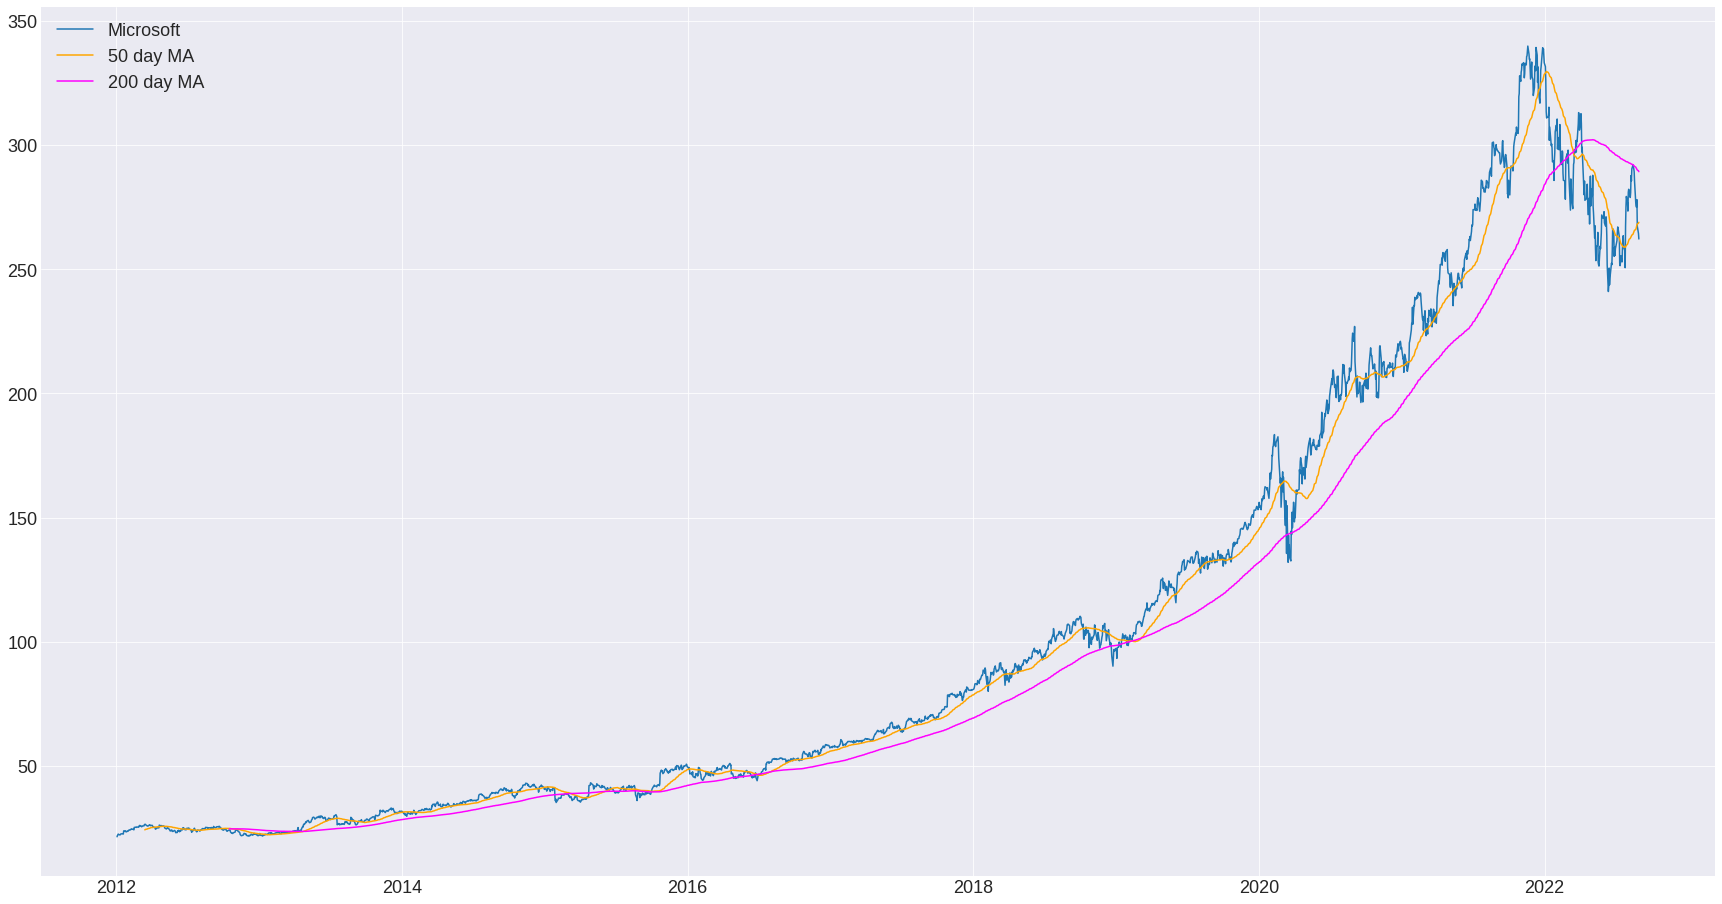

In [60]:
plt.figure(figsize=(30,16))    #Visualising calculated moving average for windows of 50 days and 200 days
MAfigure = plt.plot(MSFT_data['Adj Close'], label='Microsoft')
plt.plot(rolling_mean, label='50 day MA', color='orange')
plt.plot(rolling_mean2, label='200 day MA', color='magenta')


plt.legend(loc='upper left')

plt.show()

In [61]:
##Set up collumn for scheme two
Scheme2 = np.where(rolling_mean > rolling_mean2, 1, -1) #We will compare the rolling_mean and rolling_mean2 to see if it is greater. If it is, return 1, otherwise -1.
MSFT_data["Scheme2"] = Scheme2 #creating new column Schema2
MSFT_data.head()

,Open,High,Low,Close,Adj Close,Volume,prediction,Scheme1,Scheme2
Date,,,,,,,,,
2012-01-03,26.549999,26.959999,26.389999,26.770000,21.466700,64731500,30.049999,1,-1
2012-01-04,26.820000,27.469999,26.780001,27.400000,21.971893,80516100,31.290001,1,-1
2012-01-05,27.379999,27.730000,27.290001,27.680000,22.196424,56081400,31.250000,1,-1
2012-01-06,27.530001,28.190001,27.530001,28.110001,22.541243,99455500,31.440001,-1,-1
2012-01-09,28.049999,28.100000,27.719999,27.740000,22.244534,59706800,31.270000,1,-1


In [62]:


xfeature = MSFT_data[['Adj Close']]
yfeature = MSFT_data['Scheme2']

xfeature.head()

,Adj Close
Date,
2012-01-03,21.466700
2012-01-04,21.971893
2012-01-05,22.196424
2012-01-06,22.541243
2012-01-09,22.244534


In [63]:
#spliting the data in 80-20 using train_test_split
x_train, x_test, y_train, y_test = train_test_split(xfeature, yfeature, train_size = .8, random_state = 50)

In [64]:
x_train = scaler.transform(x_train)  #performing scaling using mean and std dev calculated using the .fit() method.
x_test = scaler.transform(x_test)

In [65]:
#Creating a Gaussian Classifier
rf_clf = RandomForestClassifier(n_estimators = 1008, max_depth = 8)
#Training the model using the training sets y_pred=rf_clf.predict(x_test)
rf_clf.fit(x_train, y_train)

RandomForestClassifier(max_depth=8, n_estimators=1008)

In [66]:
y_pred = rf_clf.predict(x_test)
# Model Accuracy, how often is the classifier correct?
print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_test, y_pred))

S2listofmodels.append("Random Forest - Scheme2")
S2listofaccuracies.append(metrics.accuracy_score(y_test, y_pred))

ACCURACY OF THE MODEL:  0.9199255121042831


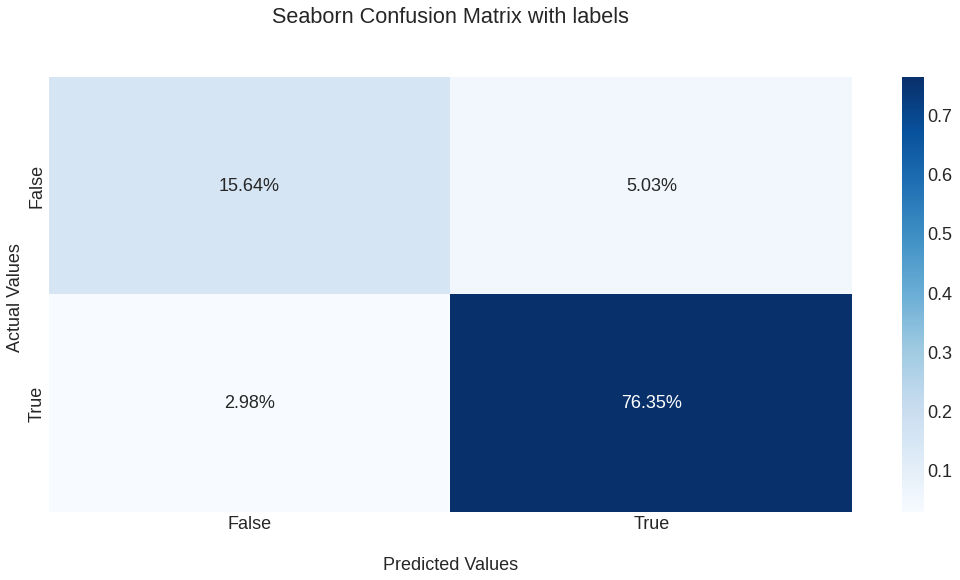

In [67]:
# visualizing the feature importance usind seaborn
cf_matrix = confusion_matrix(y_test, y_pred)
ax = sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

plt.show()

#Scheme3

In [68]:
# (ALMA) indicator is a superior moving average as compared to the Exponential Moving and Simple Moving Averages. 
from AlmaIndicator import ALMAIndicator # import the package

In [69]:
# initialize the indicator
# you only need to provide a Pandas series of the closing price of the stock
alma = ALMAIndicator(close = MSFT_data['Adj Close']) 

In [72]:
alma_nums = met.Stocks.calc_alma(MSFT_data)
alma_nums

Date
2012-01-03           NaN
2012-01-04           NaN
2012-01-05           NaN
2012-01-06           NaN
2012-01-09           NaN
                 ...    
2022-08-24    280.380556
2022-08-25    277.845419
2022-08-26    275.706078
2022-08-29    273.194336
2022-08-30    269.799105
Name: alma, Length: 2683, dtype: float64

In [73]:
#technical indicators include moving averages EMA(Exponential Moving Average)
ema = met.Stocks.calc_ema(MSFT_data)
ema.shape

(2683,)

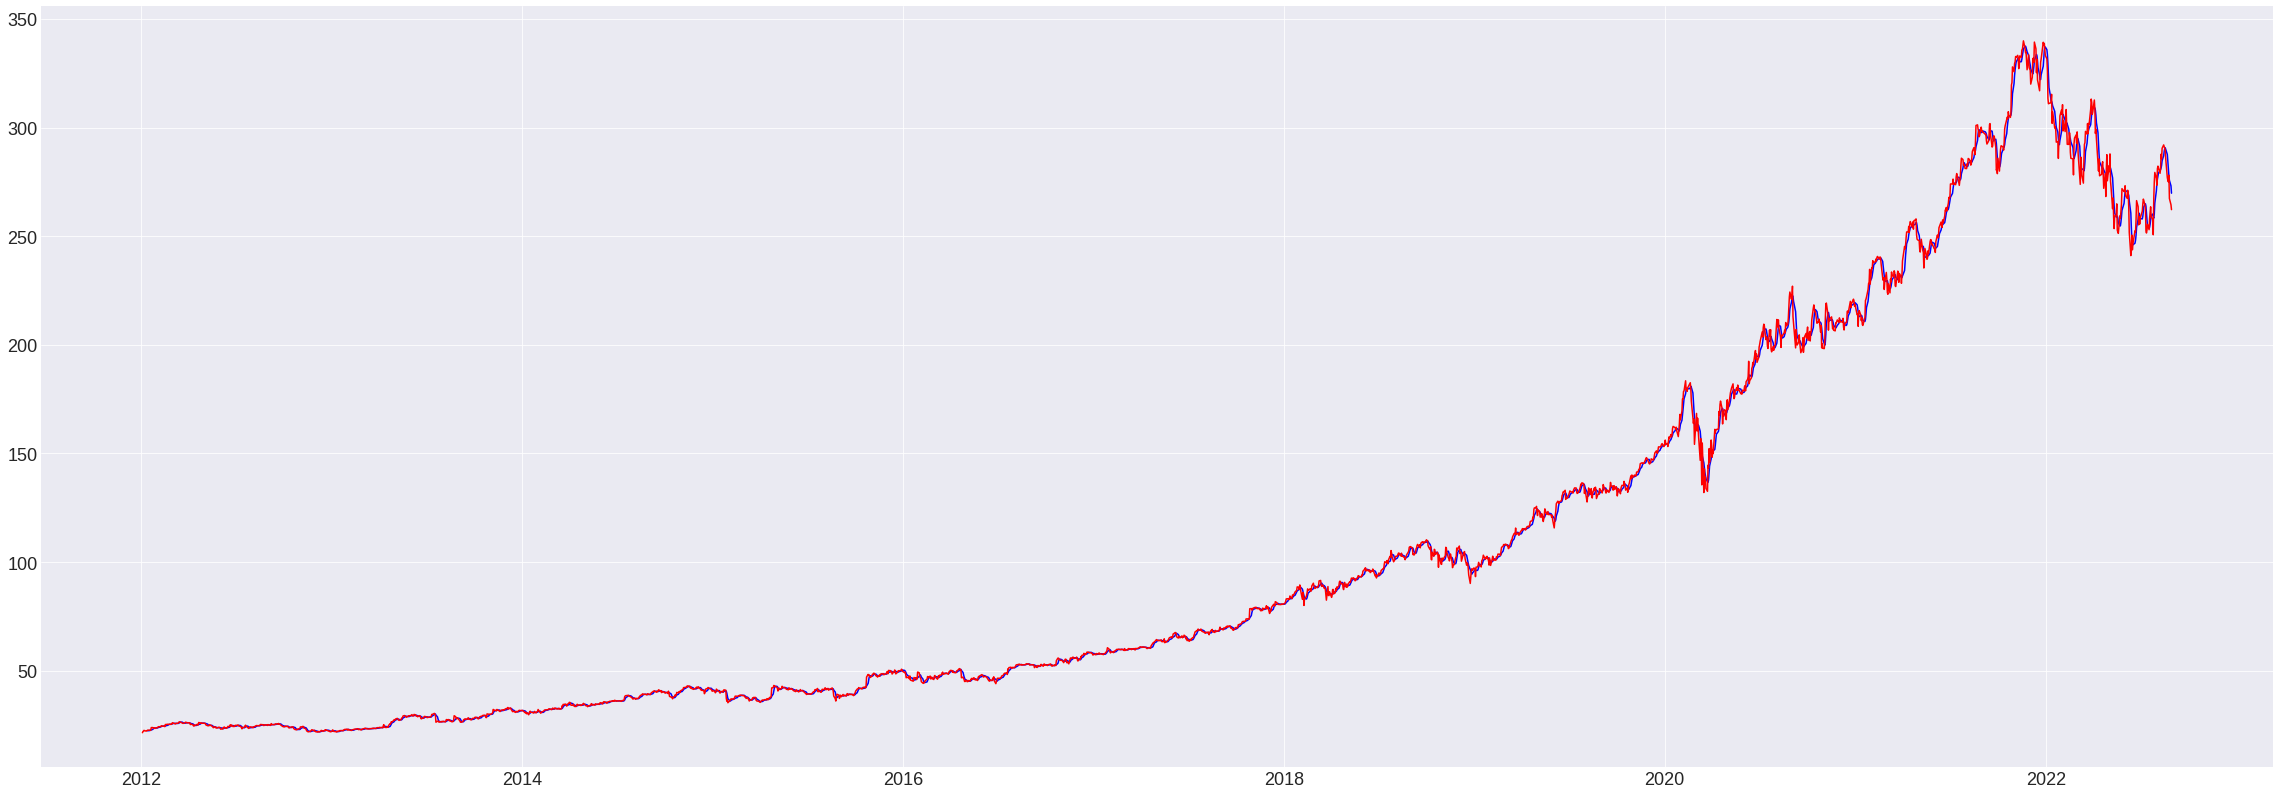

In [74]:
plt.figure(figsize=(40,14))
plt.plot(alma_nums, color = 'blue')
plt.plot(MSFT_data['Adj Close'], color = 'red')

In [75]:
#ALMA indicator is a moving average 
Scheme3 = met.Stocks.scheme_C(MSFT_data, ema, alma_nums)
MSFT_data["Scheme3"] = Scheme3
MSFT_data.head()

,Open,High,Low,Close,Adj Close,Volume,prediction,Scheme1,Scheme2,Scheme3
Date,,,,,,,,,,
2012-01-03,26.549999,26.959999,26.389999,26.770000,21.466700,64731500,30.049999,1,-1,-1
2012-01-04,26.820000,27.469999,26.780001,27.400000,21.971893,80516100,31.290001,1,-1,-1
2012-01-05,27.379999,27.730000,27.290001,27.680000,22.196424,56081400,31.250000,1,-1,-1
2012-01-06,27.530001,28.190001,27.530001,28.110001,22.541243,99455500,31.440001,-1,-1,-1
2012-01-09,28.049999,28.100000,27.719999,27.740000,22.244534,59706800,31.270000,1,-1,-1


In [76]:
##Identifying Variables
##important to use double brackets

xfeature = MSFT_data[['Adj Close']]
yfeature = MSFT_data['Scheme3']

xfeature.head()

,Adj Close
Date,
2012-01-03,21.466700
2012-01-04,21.971893
2012-01-05,22.196424
2012-01-06,22.541243
2012-01-09,22.244534


In [77]:
#spliting the data in 80-20 using train_test_split
x_train, x_test, y_train, y_test = train_test_split(xfeature, yfeature, train_size = .8, random_state = 50)

In [78]:
x_train = scaler.transform(x_train) #performing scaling using mean and std dev calculated using the .fit() method.
x_test = scaler.transform(x_test)

In [79]:
rf_clf = RandomForestClassifier(n_estimators = 1000, max_depth = 8)  #Creating a Gaussian Classifier
#Training the model using the training sets y_pred=rf_clf.predict(x_test)
rf_clf.fit(x_train, y_train)

RandomForestClassifier(max_depth=8, n_estimators=1000)

In [80]:
y_pred = rf_clf.predict(x_test)
# Model Accuracy, how often is the classifier correct?
print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_test, y_pred))

S2listofmodels.append("Random Forest - Scheme3")
S2listofaccuracies.append(metrics.accuracy_score(y_test, y_pred))

ACCURACY OF THE MODEL:  0.6108007448789572


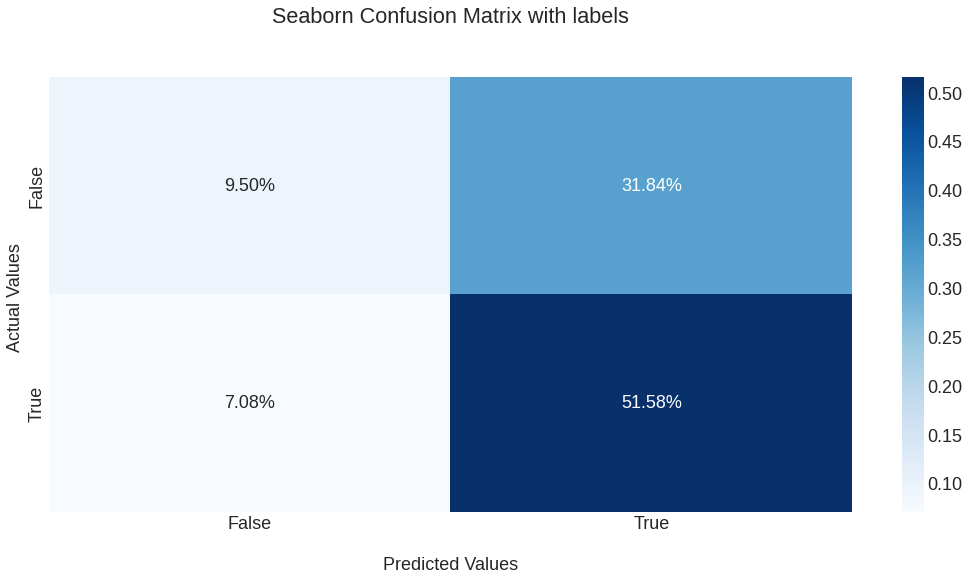

In [81]:
# visualizing the feature importance usind seaborn
cf_matrix = confusion_matrix(y_test, y_pred)
ax = sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

plt.show()

# Result

In [82]:
#Creating df which contains two main columns alogorithm and accuracy of all the schema performed above where we can compaire 3 models accuracy 
d = {
    'Algorithm': S2listofmodels,
    'Accuracy': S2listofaccuracies
}
df = pd.DataFrame(data=d)
df

,Algorithm,Accuracy
0,Random Forest - Scheme1,0.517691
1,Random Forest - Scheme2,0.919926
2,Random Forest - Scheme3,0.610801
